In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [29]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [30]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [31]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [32]:
# Save references to each table
hawaii_measurement = Base.classes.measurement
hawaii_station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set.
engine.execute('SELECT max(date) FROM Measurement').fetchall()

[('2017-08-23',)]

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
prec_data = session.query(hawaii_measurement.date, hawaii_measurement.prcp).filter(hawaii_measurement.date <= "2017-08-23" ).filter(hawaii_measurement.date >= "2016-08-23" ).all()

In [36]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(prec_data).set_index(0)
# Sort the dataframe by date
prec_df = prec_df.sort_index(ascending=False)
# Use Pandas Plotting with Matplotlib to plot the data
prec_df = prec_df.rename_axis("Date")

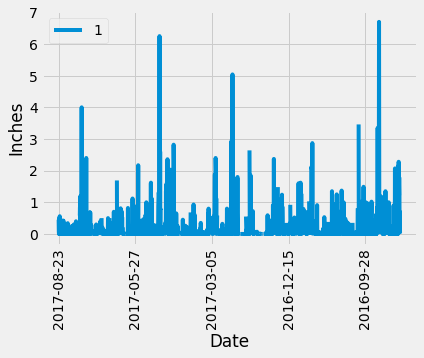

In [37]:
prec_df.plot(rot=90)
plt.savefig("Output_Images/precipitation.png")
plt.ylabel("Inches")
plt.show()

In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,1
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number stations in the dataset
number_station = session.query(hawaii_station.id).count()

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()